# Fuzzy Name Matching
## Exploratory Data Analysis

### This notebook explores the following attributes of the data.
1. What is the breakdown of matches vs. no matches for real and synthetic data?
2. How many first names are exact matches?
3. How many last names are exact matches?
4. How many duplicate keys exist?  This would apply to the real data where the same key is presumed to be the same person.
5. What is the distribution of the number of characters in each name?
6. How many names have multiple words?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Interim Data File Locations
interim_data = '../data/interim/'

In [3]:
df = pd.read_csv(interim_data + 'data_wrangling_results.csv')
df.shape

(97110, 7)

In [4]:
# Drop rows with missing data
df = df.dropna()
df.shape

(97108, 7)

In [5]:
eda = df.copy()

In [6]:
def match_text(row):
    if row.is_match == 0:
        return 'No-Match'
    else:
        return 'Match'
eda['is_match_text'] = eda.apply(lambda x: match_text(x), axis=1)

In [7]:
def set_data_type(row):
    if row.confidential == 0:
        return 'Synthetic'
    else:
        return 'Real'
eda['data_type'] = eda.apply(lambda x: set_data_type(x), axis=1)

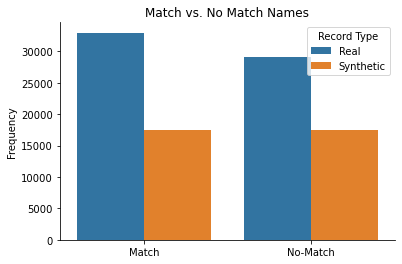

In [8]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='is_match_text', hue='data_type', ax=ax)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Match vs. No Match Names')
plt.legend(title='Record Type', loc='upper right')
sns.despine()
plt.show()

The distribution between match and no match names are relatively equal.</br>
The synthetic data match and no match counts are exactly equal as it is the same data except that the no match data has the names shuffled.

In [9]:
def match_first_names(row):
    if row.list_first_name == row.txn_first_name:
        return 'Match'
    else:
        return 'No-Match'
eda['is_match_first'] = eda.apply(lambda x: match_first_names(x), axis=1)

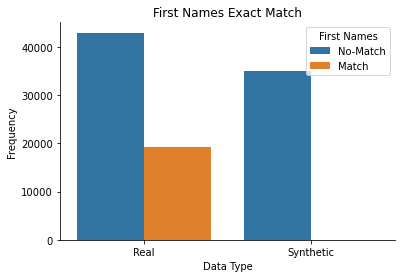

In [10]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='data_type', hue='is_match_first', ax=ax)
plt.xlabel('Data Type')
plt.ylabel('Frequency')
plt.title('First Names Exact Match')
# ax.set_xticklabels(['Sythetic', 'Real'])
plt.legend(title='First Names', loc='upper right')
sns.despine()
plt.show()

The synthetic data does not have any first name matches as the match records were duplicated and then the names shuffled.</br>
Most the real data have first names that do not match.  In the cases where the real data first names do match, the last names should not be exact matches.

In [11]:
def match_last_names(row):
    if row.list_last_name == row.txn_last_name:
        return 'Match'
    else:
        return 'No-Match'
eda['is_match_last'] = eda.apply(lambda x: match_last_names(x), axis=1)

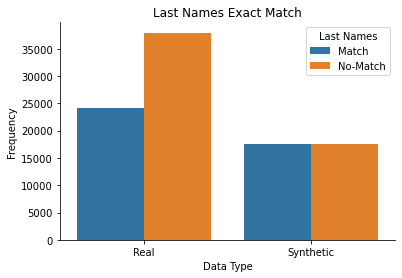

In [12]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='data_type', hue='is_match_last', ax=ax)
plt.xlabel('Data Type')
plt.ylabel('Frequency')
plt.title('Last Names Exact Match')
plt.legend(title='Last Names', loc='upper right')
sns.despine()
plt.show()

The synthetic data has exactly the same number of matches and no matches.  This is because the matches only contain variations of first names.  </br>
Most the real data have last names that do not match.  In the cases where the real data last names do match, the first names should not be exact matches.

In [13]:
dups = pd.DataFrame(eda.groupby(['data_type', 'key']).size()).reset_index()
dups.columns = ['data_type', 'key', 'key_count']

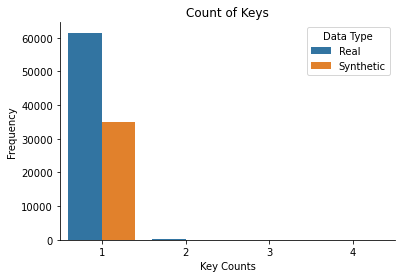

In [14]:
fig, ax = plt.subplots()
sns.countplot(data=dups, x='key_count', hue='data_type', ax=ax)
plt.xlabel('Key Counts')
plt.ylabel('Frequency')
plt.title('Count of Keys')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

Most of the keys are unique, but some have 2-4 duplicates.  

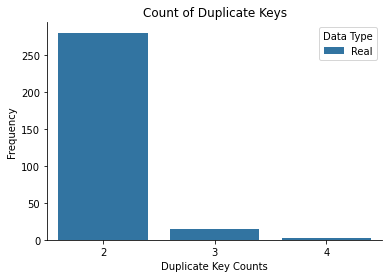

In [15]:
fig, ax = plt.subplots()
sns.countplot(data=dups[dups.key_count>1], x='key_count', hue='data_type', ax=ax)
plt.xlabel('Duplicate Key Counts')
plt.ylabel('Frequency')
plt.title('Count of Duplicate Keys')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

The synthetic data does not have any duplicate keys.</br>
The real data does have approximately 300 records with duplicate keys.  This can occur if the same individual had multiple transactions where the names provided were not exactly the same.

In [16]:
eda['list_first_name_length'] = eda.list_first_name.str.len()
eda['list_last_name_length'] = eda.list_last_name.str.len()
eda['txn_first_name_length'] = eda.txn_first_name.str.len()
eda['txn_last_name_length'] = eda.txn_last_name.str.len()

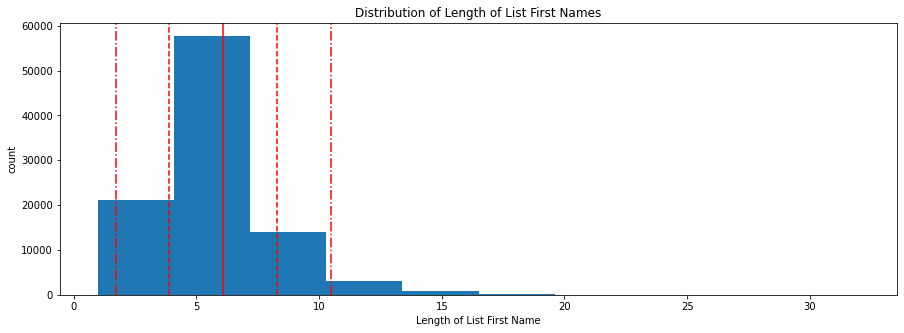

In [17]:
length_mean = eda.list_first_name_length.mean()
length_std = eda.list_first_name_length.std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=eda, x='list_first_name_length')
_ = plt.xlabel('Length of List First Name')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Length of List First Names')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(length_mean, color='r')
_ = plt.axvline(length_mean+length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean+(2*length_std), color='r', linestyle='-.')
_ = plt.axvline(length_mean-length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean-(2*length_std), color='r', linestyle='-.')

The length of first names on the list range from 1 (first initial only) to >30 with a mean of 6 letters.

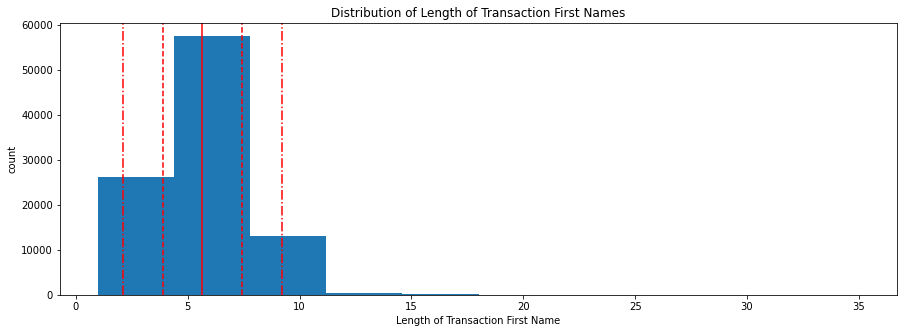

In [18]:
length_mean = eda.txn_first_name_length.mean()
length_std = eda.txn_first_name_length.std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=eda, x='txn_first_name_length')
_ = plt.xlabel('Length of Transaction First Name')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Length of Transaction First Names')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(length_mean, color='r')
_ = plt.axvline(length_mean+length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean+(2*length_std), color='r', linestyle='-.')
_ = plt.axvline(length_mean-length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean-(2*length_std), color='r', linestyle='-.')

The length of first names on the transactions range from 1 (first initial only) to >30 with a mean of 6 letters.</br>
This is similar to the distribution of the list first names.

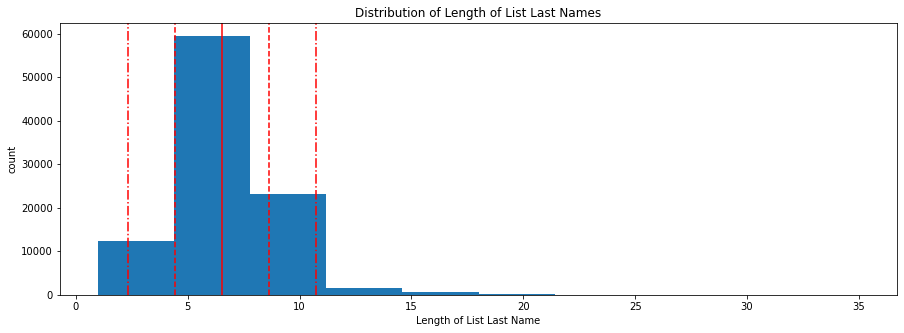

In [19]:
length_mean = eda.list_last_name_length.mean()
length_std = eda.list_last_name_length.std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=eda, x='list_last_name_length')
_ = plt.xlabel('Length of List Last Name')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Length of List Last Names')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(length_mean, color='r')
_ = plt.axvline(length_mean+length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean+(2*length_std), color='r', linestyle='-.')
_ = plt.axvline(length_mean-length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean-(2*length_std), color='r', linestyle='-.')

The length of last names on the list range from 1 (initial only) to >35 with a mean of 6-7 letters.

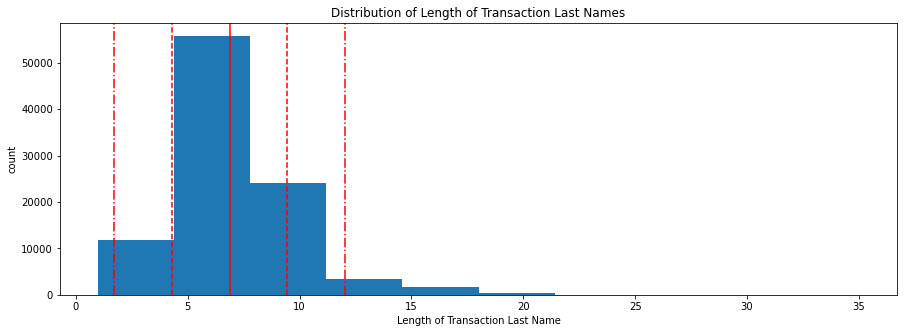

In [20]:
length_mean = eda.txn_last_name_length.mean()
length_std = eda.txn_last_name_length.std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=eda, x='txn_last_name_length')
_ = plt.xlabel('Length of Transaction Last Name')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Length of Transaction Last Names')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(length_mean, color='r')
_ = plt.axvline(length_mean+length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean+(2*length_std), color='r', linestyle='-.')
_ = plt.axvline(length_mean-length_std, color='r', linestyle='--')
_ = plt.axvline(length_mean-(2*length_std), color='r', linestyle='-.')

The length of last names on the transactions range from 1 (initial only) to >35 with a mean of 7-8 letters.
This is similar to the distribution of the list last names.

In [21]:
def set_multiple_words(name):
    if " " in name:
        return True
    elif "-" in name:
        return True
    else:
        return False
eda['list_first_multi'] = eda.apply(lambda x: set_multiple_words(x.list_first_name), axis=1)
eda['txn_first_multi'] = eda.apply(lambda x: set_multiple_words(x.txn_first_name), axis=1)
eda['list_last_multi'] = eda.apply(lambda x: set_multiple_words(x.list_last_name), axis=1)
eda['txn_last_multi'] = eda.apply(lambda x: set_multiple_words(x.txn_last_name), axis=1)

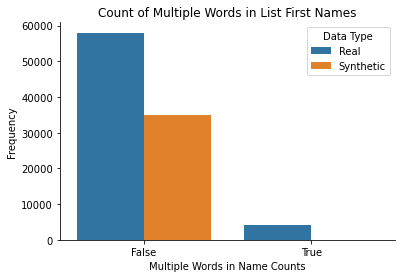

In [22]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='list_first_multi', hue='data_type', ax=ax)
plt.xlabel('Multiple Words in Name Counts')
plt.ylabel('Frequency')
plt.title('Count of Multiple Words in List First Names')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

The real data have approximately 4000 first names on the list that contain multiple words.</br>
The synthetic data does not have any first names on the list that contain multiple words.

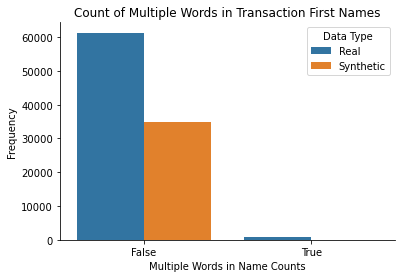

In [23]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='txn_first_multi', hue='data_type', ax=ax)
plt.xlabel('Multiple Words in Name Counts')
plt.ylabel('Frequency')
plt.title('Count of Multiple Words in Transaction First Names')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

The real data have a small number of first names on the list that contain multiple words.</br>
The synthetic data does not have any first names on the list that contain multiple words.

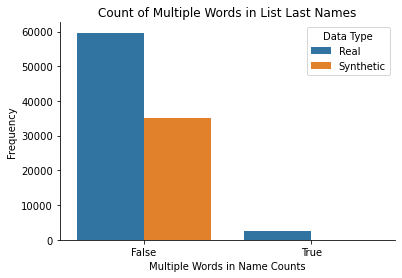

In [24]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='list_last_multi', hue='data_type', ax=ax)
plt.xlabel('Multiple Words in Name Counts')
plt.ylabel('Frequency')
plt.title('Count of Multiple Words in List Last Names')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

The real data have approximately 2000 last names on the list that contain multiple words.</br>
The synthetic data does not have any last names on the list that contain multiple words.

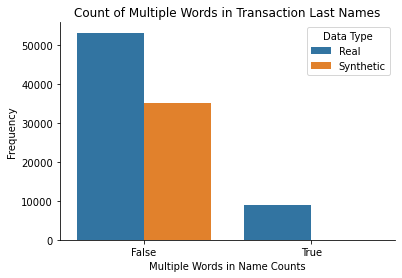

In [25]:
fig, ax = plt.subplots()
sns.countplot(data=eda, x='txn_last_multi', hue='data_type', ax=ax)
plt.xlabel('Multiple Words in Name Counts')
plt.ylabel('Frequency')
plt.title('Count of Multiple Words in Transaction Last Names')
plt.legend(title='Data Type', loc='upper right')
sns.despine()
plt.show()

The real data have just under 10,000 first names on the list that contain multiple words.</br>
The synthetic data does not have any first names on the list that contain multiple words.

In [26]:
# Save output to interim data folder as csv file
df.to_csv(interim_data + 'eda_results.csv', index=False)